<a href="https://colab.research.google.com/github/LiscaAngriani/APM_Kelompok3/blob/main/SVM_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
clf = SVC(kernel='linear')

In [2]:
#importing the dataset
df = pd.read_csv('Iklan Media Sosial.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:, -1].values
print(x[0:5])

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]


In [4]:
print(y[0:5])

[0 0 0 0 0]


In [5]:
#Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.29, random_state =0)

In [6]:
#scalling feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)

In [7]:
print(x_train[0:5])

[[ 0.69552659  1.76261186]
 [-0.68098597  0.54767778]
 [ 0.79384892  0.34518877]
 [ 0.89217124 -0.55154829]
 [-1.1725976  -1.59292036]]


In [8]:
print(x_test[0:5])

[[-0.77930829  0.48982378]
 [ 0.00727031 -0.5804753 ]
 [-0.28769666  0.14269975]
 [-0.77930829  0.25840776]
 [-0.28769666 -0.5804753 ]]


In [9]:
#Training the Kernel SVM model on the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [10]:
#Predicting the Test set results
y_predict = classifier.predict(x_test)

In [11]:
y_predict[0:5]

array([0, 0, 0, 0, 0])

In [12]:
#making the confusion matrix

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Accuracy:')
print((y_test==y_pred).sum()/len(y_pred))

Accuracy:
0.8706896551724138


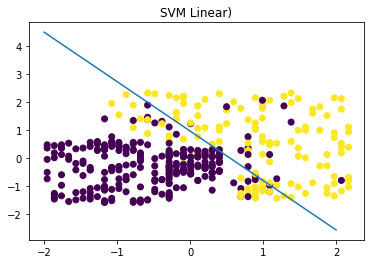

In [13]:
#Visualisasi

plt.scatter(x_test[:,0],x_test[:,1],c = y_pred)
plt.scatter(x_train[:,0],x_train[:,1],c = y_train)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 2)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.title('SVM Linear)')
plt.plot(xx, yy)
plt.show()